# Titanic kaggle challenge
### Problem definition
Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

### Background information
On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

#### Jupyter notebook cheat sheet available at: https://cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/pdf_bw/

### Example Workflow (from Manav Sehgal)

**Classifying**: We may want to **classify or categorize our samples.** We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating**: One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a **correlation among a feature and solution goal?** As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. **Correlating certain features may help in creating, completing, or correcting features.**

**Converting**: For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing**: Data preparation may also require us **to estimate any missing values within a feature**. Model algorithms may work best when there are no missing values.

**Correcting**: We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contributing to the analysis or may significantly skew the results.

**Creating**: Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting**: How to select the right visualization plots and charts depending on nature of the data and the solution goals.

#### Important note
Often times in order to get a good solution to a problem, most of the following steps have to be performed
iteratively. This way you can significantly improve your solution each iteration. 


## Step 1: Load necessary libraries for analysis
Note: The necessary libraries should be downloaded prior to loading the notebook.


In [1]:
# Load the following libraries, sometimes called dependencies.
# short recap: pandas is used to load and manipulate datasets, numpy is used for numerical operations (linear algebra)
import pandas as pd
import numpy as np
import random as rnd
import os

# visualization libraries, seaborn is an extention to matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Step 2: Load in the data
To acquire the data and basic information regarding the data, head to: https://www.kaggle.com/c/titanic/data
and register to download the data.
Make sure the files are unzipped in the same folder as this notebook

In [2]:
# print the current folder
path = os.getcwd()
print(path)
# if the train and test set are in the same folder as printed below, we can load the data into pandas DataFrames
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combined_df = pd.concat([train_df, test_df], axis=0) # This dataframe contains both the train AND test data.

/Users/juanbenjumea/coding/EHB/AIE/Les6


## Step 3: Data exploration

**Print the names of the columns of the dataset** 

In [3]:
print(combined_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
print(test_df.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


**To get a general overview of the different datatypes, amount of missing values, etc. in the dataset:**

In [5]:
train_df.info()
print('_'*40)
test_df.info()
# We will go into more detail shortly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

### Analyze your features:

We can see that there are 891 people in the current dataset. 

**Which features are categorical?**
These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

**Categorical**: Survived, Sex, and Embarked. **Ordinal**: Pclass.

**Which features are numerical?**

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

**Continous**: Age, Fare. **Discrete**: SibSp, Parch.

**Which features contain blank, null or empty values?**

These will require correcting.

Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
Cabin > Age are incomplete in case of test dataset.

**What are the data types for various features?**

Helping us during converting goal.

Seven features are integer or floats. Six in case of test dataset (in the test set we have no Survived variable).
Five features are strings (object).

**Preview the data**

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Which features are mixed data types?**

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.
Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

**Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

**Preview the last datapoints:**

In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Descriptive statistics:
Another way to get some insights into the features: 

What is the distribution of numerical feature values across the samples?

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.


**Numerical features**

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observations**

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

**Categorical data**

In [9]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**What is the distribution of categorical features?**

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several duplicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

### Step 4: Data preprocessing

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating**: 
- We want to know how well does each feature correlate with Survival. 
- We want to do this early in our project and match these quick correlations with modelled correlations later in the project.
- We want to check whether correlations with survival are likely causal or confounded.

**Completing**: 
- We may want to complete Age feature as it is definitely correlated to survival.
- We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

**Correcting**:
- We assume Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
- We assume Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
- We assume PassengerId may be dropped from training dataset as it does not contribute to survival.
- We assume Name feature is relatively non-standard, may not contribute directly to survival, so may be dropped.

**Creating**:
- We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
- We may want to engineer the Name feature to extract Title as a new feature.
- We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
- We may also want to create a Fare range feature if it helps our analysis.

**Classifying**:
- We may also add to our assumptions based on the problem description noted earlier.
- Women (Sex=female) were more likely to have survived.
- Children (Age<?) were more likely to have survived.
- The upper-class passengers (Pclass=1) were more likely to have survived.

Note: We will not test every assumption in this notebook, as some will be left out for you to practice.


### Analyze by pivoting features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.



In [14]:
corr = train_df.select_dtypes(include='number').corr() #pearson correlation coefficient

In [15]:
corr["Pclass"].sort_values(ascending=False)

Pclass         1.000000
SibSp          0.083081
Parch          0.018443
PassengerId   -0.035144
Survived      -0.338481
Age           -0.369226
Fare          -0.549500
Name: Pclass, dtype: float64

We see that a higher Pclass, which actually means a lower class ticket, is inversely correlated to fare, age and survived. This means that people with a lower class ticket were more likely to have a cheaper ticket, younger age and were less likely to survive. However, this does not necessarily mean that this is a causal relationship, meaning that that the lower class is the cause of the cheaper ticket, younger age and lower survival odds (Although it is pretty likely that the lower class ticket is the cause of a cheaper fare price :) ). PassengerID, which is just a random id number, has a correlation of almost zero, which is expected. 

In [17]:
corr["Fare"].sort_values(ascending=False)

Fare           1.000000
Survived       0.257307
Parch          0.216225
SibSp          0.159651
Age            0.096067
PassengerId    0.012658
Pclass        -0.549500
Name: Fare, dtype: float64

We can see that a higher fare is correlated to higher survival rates, more siblings and more children or parents. We also observe that Fare has the exact same correlation to Pclass as Pclass to Fare (which is a result of the definition of correlation).

In [19]:
corr["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Maybe the most important correlations can be found by looking at Survived. We see that there is a positive correlation with Fare, so if you paid more, you were more likely to survive and that a lower class meant a lower chance of survival. 

**Note**: These are correlations, which give us an idea of which variables are correlated to eachother and with survival, however, this does not always mean they are good variables for a prediction model. Sometimes features carry similar information as other features, which can result in a higher correlation, but makes them redundant for that same reason. We make educated guesses based on this exploratory analysis on which features will be good predictors. Luckily, we can validate our assumptions later on by using feature importance methods.

We can look at individual features and how their different levels correlate to mean survival.

In [20]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [26]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [28]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Observations**

**Pclass**: We observe significant correlation (>0.5) among Pclass=1 and Survived (third classifying assumption). We decide to include this feature in our model.

**Sex**: We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (first classifying assumption).

**SibSp and Parch**: These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (First creating assumption).

### Analyze via visualisation
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

**Correlating numerical features**

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

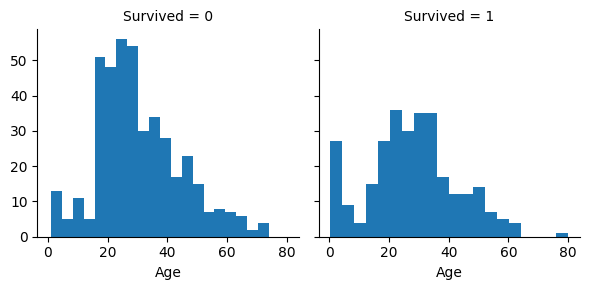

In [29]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)



**Observations** 

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-30 year olds did not survive.
- Most passengers are in 15-35 age range.

**Decisions**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age (second classifying assumption) in our model training.
- Complete the Age feature for null values (first completing assumption).
- We have to try to band age groups (third creating assumption), which is often referred to as binning.

### Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.



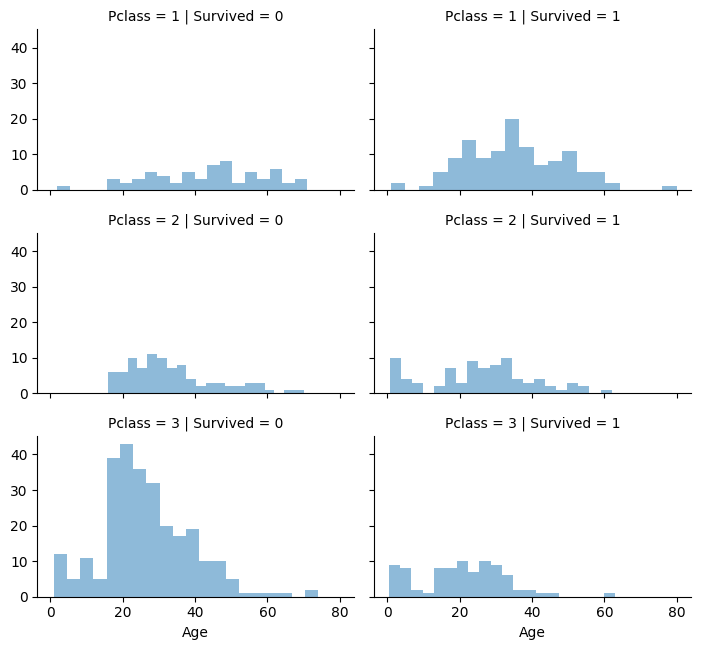

In [31]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Observations**
- Pclass=3 had most passengers, however most did not survive. Confirms our second classifying assumption
- Infant passengers in Pclass=2 mostly survived. Further qualifies our second classifying assumption.
- Most passengers in Pclass=1 survived. Confirms our third classifying assumption.
- Pclass varies in terms of Age distribution of passengers.

**Decisions**

Consider Pclass for model training.

### Correlating categorical features
Now we can correlate categorical features with our solution goal.


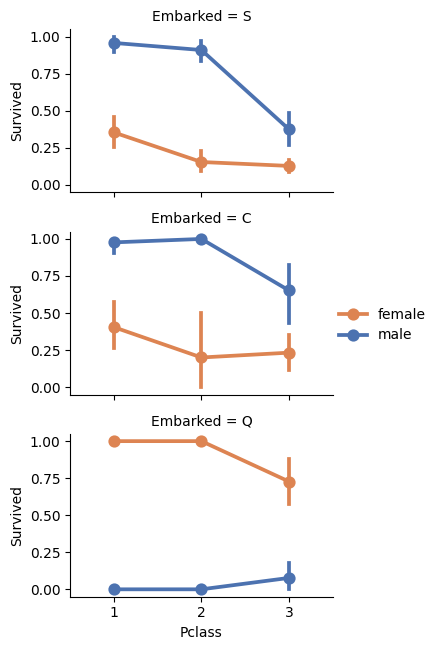

In [33]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()


**Observations**: 
- Female passengers had much better survival rate than males. Confirms first classifying assumption.
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Confirms second Completing assumption.
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Confirms first Correlating assumption.

**Decisions**:
- Add Sex feature to model training.
- Complete and add Embarked feature to model training.

**Correlating categorical and numerical features**

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric)

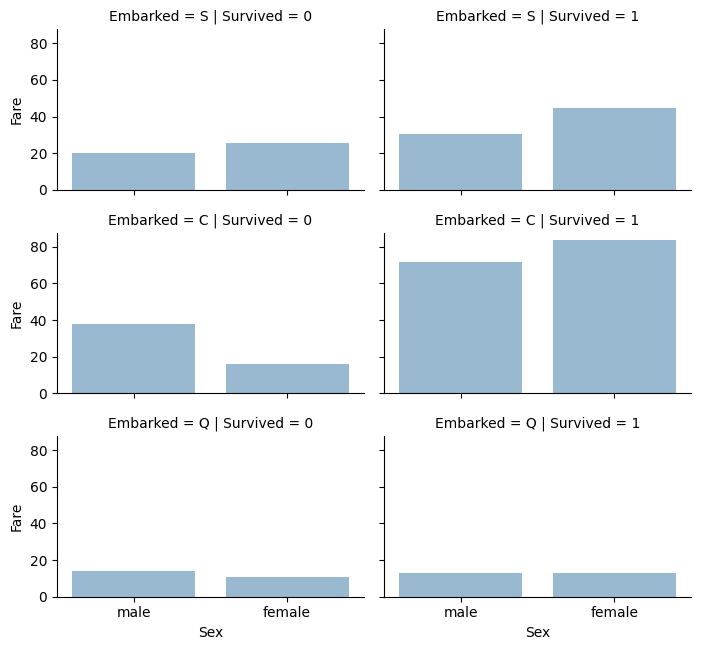

In [35]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**Observations**

- Higher fare paying passengers had better survival. Confirms our fourth assumption for creating fare ranges and our previous correlation observations.
- Port of embarkment seems to correlate with survival rates. Confirms our first correlating and second completings assumptions. However, it is possible this is just the correlation of embarkment with fare: We see that in general the survivors had paid more than the non-survivors, except for those embarked in Q.

**Decisions**

Consider banding Fare feature.
Look into predictive power of embarkment.

### Wrangle data
We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

**Correcting by dropping features**

This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis. Furthermore in some cases bad or correlated features confuse the algorithm resulting in a worse performance.

_Based on our assumptions and decisions we want to drop the Cabin (second correcting assumption) and Ticket (first correcting assumption) features_, however we will not drop both features just yet, as we will use them later on to create a new feature.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [36]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Creating new feature extracting from existing
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

In [38]:
combined_df['Title'] = combined_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_df['Title'] = combined_df['Title'][:891]
test_df['Title'] = combined_df['Title'][891:]

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as Rare:

In [39]:
combined_df['Title'] = combined_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

combined_df['Title'] = combined_df['Title'].replace('Mlle', 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Ms', 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Mme', 'Mrs')


train_df['Title'] = combined_df['Title'][:891]
test_df['Title'] = combined_df['Title'][891:]

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [40]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


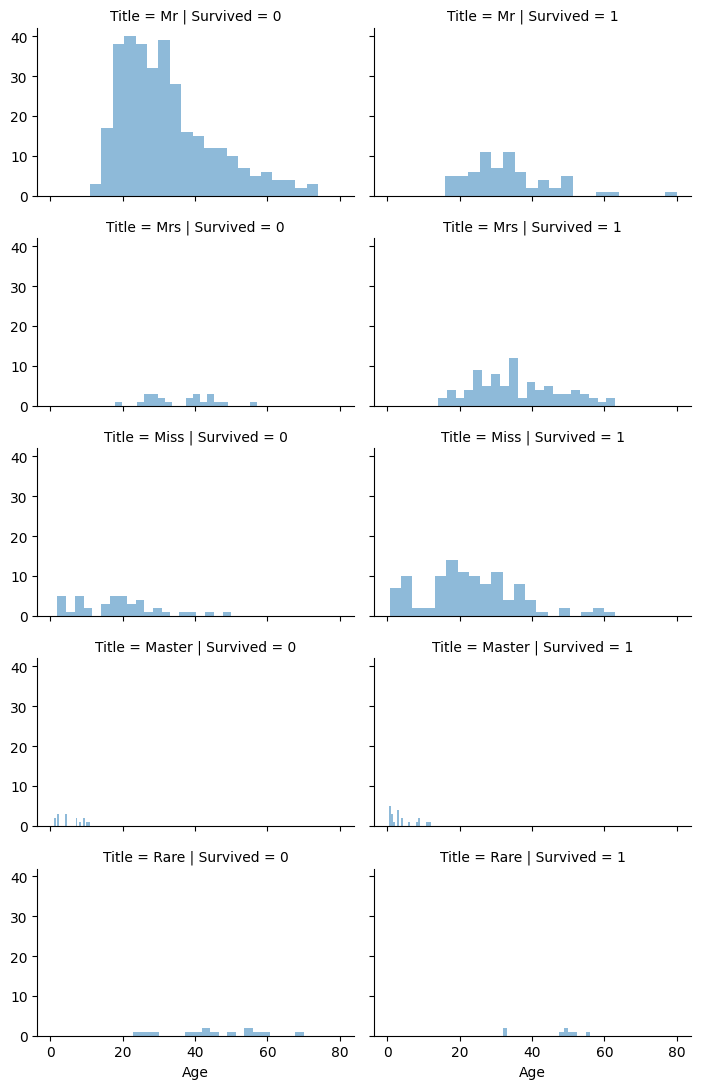

In [42]:
grid = sns.FacetGrid(train_df, row='Title', col='Survived', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

**Observations**

When we plot Title, Age, and Survived, we note the following observations.

- Certain titles mostly survived (Master, Miss, Mrs) or did not (Mr, and Rare).

**Decision**

We decide to retain the new Title feature for model training.

We can convert the categorical titles to ordinal: the order DOES matter!!
We follow the order based on the mean survival rate.

In [43]:
title_mapping = {"Mr": 1, "Rare": 2, "Master": 3, "Miss": 4, "Mrs": 5}
combined_df['Title'] = combined_df['Title'].map(title_mapping)
combined_df['Title'] = combined_df['Title'].fillna(0)

train_df['Title'] = combined_df['Title'][:891]
test_df['Title'] = combined_df['Title'][891:]

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [46]:
corr = train_df.select_dtypes(include='number').corr()
corr["Survived"].sort_values(ascending=False)

Survived       1.000000
Title          0.565716
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

There seems to be a significant positive correlation between survival and Title, double as strong as between fare and survival. Time to investigate.

In [44]:
train_df[['Title', 'Fare']].groupby(['Title'], as_index=False).mean()

,Title,Fare
0,1,24.441560
1,2,37.169748
2,3,34.703125
3,4,43.800092
4,5,45.330290


We can also see from the table above, that the average ticket price of a title class differs: the higher the class according to survival rate, the higher the mean fare price. If we combine this knowledge with the fact that the two most surviving title classes, Mrs and Miss, are both female, we might not be have a causal relation after all...
It looks like Title just contains information about ticket price and sex.., which we know are also positively correlated to survival. However, this does not mean it is for certain a bad/good predictor of survival for all models.

### Converting a categorical feature
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [47]:
combined_df.replace(['male','female'],[0,1],inplace=True)
train_df = combined_df[:891]
test_df = combined_df[891:]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,5
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,5
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [49]:
corr = train_df.select_dtypes(include='number').corr()
corr["Survived"].sort_values(ascending=False)

Survived       1.000000
Title          0.565716
Sex            0.543351
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

We see that Sex is almost as correlated to survival as Title

In [50]:
corr["Sex"].sort_values(ascending=False)

Sex            1.000000
Title          0.944195
Survived       0.543351
Parch          0.245489
Fare           0.182333
SibSp          0.114631
PassengerId   -0.042939
Age           -0.093254
Pclass        -0.131900
Name: Sex, dtype: float64

In the table above, we can now clearly see that Sex is highly correlated to Title. Which means that they contain very similar information. (in this specific table, the correlation means, a higher value of Sex, thus female, is correlated to a higher value of Title, thus Miss and Mrs).
For now, we assume that Title does not contain unique information about the survival chances of persons on the Titanic, however, we will keep the variable and verify this assumption in the modelling phase.

### Completing a numerical continuous feature
Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, and Title (as we saw that mean age differs between different titles). Guess Age values using median values for Age across various Titles. So, median Age for all the Title classes we made earlier.

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on Titles.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

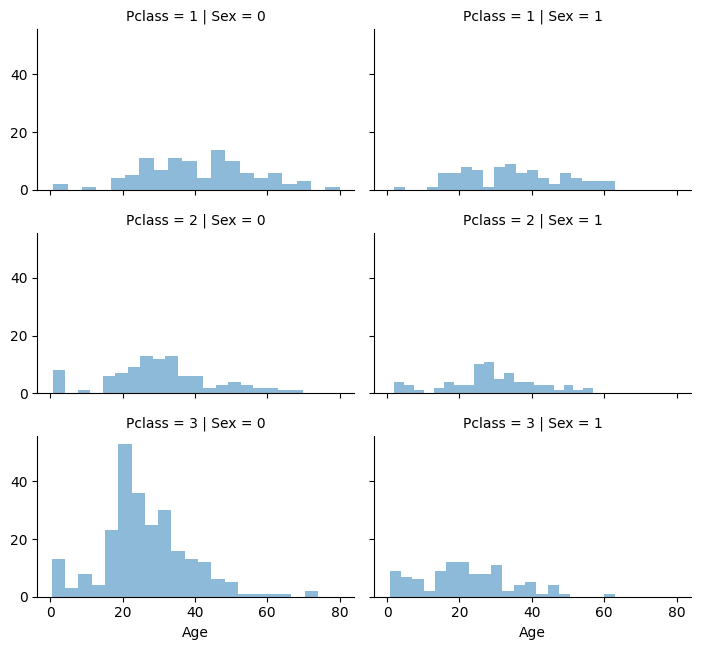

In [52]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [53]:
train_df[['Title', 'Age']].groupby(['Title'], as_index=False).mean()

,Title,Age
0,1,32.368090
1,2,45.545455
2,3,4.574167
3,4,21.845638
4,5,35.788991


In [54]:
titles = list(train_df['Title'].unique())
for title in titles:
    age_to_impute = list(combined_df.groupby('Title')['Age'].median())[titles.index(title)]
    mask = (combined_df['Title'] == title)
    combined_df.loc[combined_df['Age'].isnull() & mask, 'Age'] = age_to_impute 

train_df['Age'] = combined_df['Age'][:891]
test_df['Age'] = combined_df['Age'][891:]
combined_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,5
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,5
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0.0,3,"Moran, Mr. James",0,29.0,0,0,330877,8.4583,NaN,Q,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,5
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,5


Let us create Age bands and determine correlations with Survived.

In [ ]:
from sklearn.preprocessing import LabelEncoder

## We will use the LabelEncoder to convert categorical variables into numerical ones
combined_df['AgeBin'] = pd.qcut(combined_df['Age'], 4)

label = LabelEncoder() 
combined_df['AgeBin_Code'] = label.fit_transform(combined_df['AgeBin'])

train_df['AgeBin_Code'] = combined_df['AgeBin_Code'][:891]
test_df['AgeBin_Code'] = combined_df['AgeBin_Code'][891:]
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBin_Code
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,5,3
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,5,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,2
5,6,0.0,3,"Moran, Mr. James",0,29.0,0,0,330877,8.4583,NaN,Q,1,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,1,3
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,3,0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,5,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,5,0


In [56]:
train_df[['AgeBin_Code', 'Survived']].groupby(['AgeBin_Code'], as_index=False).mean().sort_values(by='AgeBin_Code', ascending=True)

,AgeBin_Code,Survived
0,0,0.454918
1,1,0.277592
2,2,0.459259
3,3,0.403756


Let us replace Age with ordinals based on these bands, but first we make a feature 'Age_original' to check whether the original, non-binned age, is a good predictor.

In [57]:
combined_df['Age_original'] = combined_df['Age']
train_df['Age_original'] = combined_df['Age_original'][:891]
test_df['Age_original'] = combined_df['Age_original'][891:]
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBin_Code,Age_original
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,22.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,5,3,38.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,1,26.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,5,2,35.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,2,35.0
5,6,0.0,3,"Moran, Mr. James",0,29.0,0,0,330877,8.4583,NaN,Q,1,1,29.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,1,3,54.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,3,0,2.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,5,1,27.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,5,0,14.0


In [58]:
combined_df.loc[ combined_df['Age'] <= 4, 'Age'] = 0
combined_df.loc[(combined_df['Age'] > 4) & (combined_df['Age'] <= 15), 'Age'] = 1
combined_df.loc[(combined_df['Age'] > 15) & (combined_df['Age'] <= 35), 'Age'] = 2
combined_df.loc[(combined_df['Age'] > 35) & (combined_df['Age'] <= 64), 'Age'] = 3
combined_df.loc[(combined_df['Age'] > 64) & (combined_df['Age'] <= 75), 'Age'] = 4
combined_df.loc[(combined_df['Age'] > 75), 'Age'] = 5

train_df['Age'] = combined_df['Age'][:891]
test_df['Age'] = combined_df['Age'][891:]
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBin_Code,Age_original
0,1,0.0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S,1,1,22.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,5,3,38.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,1,26.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,5,2,35.0
4,5,0.0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,1,2,35.0
5,6,0.0,3,"Moran, Mr. James",0,2.0,0,0,330877,8.4583,NaN,Q,1,1,29.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,S,1,3,54.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,S,3,0,2.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,11.1333,NaN,S,5,1,27.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,30.0708,NaN,C,5,0,14.0


In [59]:
train_df[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.0,0.644737
1,1.0,0.511628
2,2.0,0.324022
3,3.0,0.428571
4,4.0,0.000000
5,5.0,1.000000


### Create new feature combining existing features
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [60]:
combined_df['Family_Size'] = combined_df['Parch'] + combined_df['SibSp']

# Substituting values in TRAIN_DF and TEST_DF:
train_df['Family_Size'] = combined_df['Family_Size'][:891]
test_df['Family_Size'] = combined_df['Family_Size'][891:]

train_df[['Family_Size', 'Survived']].groupby(['Family_Size'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family_Size,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


We can create another feature called IsAlone.

In [61]:
combined_df['Is_Alone'] = 0
combined_df.loc[combined_df['Family_Size'] == 0, 'Is_Alone'] = 1

# Substituting values in TRAIN_DF and TEST_DF:
train_df['Is_Alone'] = combined_df['Is_Alone'][:891]
test_df['Is_Alone'] = combined_df['Is_Alone'][891:]

train_df[['Is_Alone', 'Survived']].groupby(['Is_Alone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Is_Alone,Survived
0,0,0.505650
1,1,0.303538


We can also create a feature related to the survival of a family by creating family groups. As done by https://www.kaggle.com/shunjiangxu/blood-is-thicker-than-water-friendship-forever
To show the difference between family survival and family group survival, take a look at the following code:

In [63]:
combined_df['Last_Name'] = combined_df['Name'].apply(lambda x: str.split(x, ",")[0])
combined_df['Fare'].fillna(combined_df['Fare'].mean(), inplace=True)

DEFAULT_SURVIVAL_VALUE = 0.5
combined_df['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in combined_df[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                combined_df.loc[combined_df['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                combined_df.loc[combined_df['PassengerId'] == passID, 'Family_Survival'] = 0

print("Number of passengers with family survival information:", 
      combined_df.loc[combined_df['Family_Survival']!=0.5].shape[0])

Number of passengers with family survival information: 420


In [64]:
for _, grp_df in combined_df.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    combined_df.loc[combined_df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    combined_df.loc[combined_df['PassengerId'] == passID, 'Family_Survival'] = 0
                        
print("Number of passenger with family/group survival information: " 
      +str(combined_df[combined_df['Family_Survival']!=0.5].shape[0]))

# # Family_Survival in TRAIN_DF and TEST_DF:
train_df['Family_Survival'] = combined_df['Family_Survival'][:891]
test_df['Family_Survival'] = combined_df['Family_Survival'][891:]

Number of passenger with family/group survival information: 546


We can also create an artificial feature combining Pclass and Age.

In [65]:
combined_df['AgeClass'] = combined_df.Age * combined_df.Pclass

# Substituting values in TRAIN_DF and TEST_DF:
train_df['AgeClass'] = combined_df['AgeClass'][:891]
test_df['AgeClass'] = combined_df['AgeClass'][891:]

train_df.loc[:, ['AgeClass', 'Age', 'Pclass']].head(10)

,AgeClass,Age,Pclass
0,6.0,2.0,3
1,3.0,3.0,1
2,6.0,2.0,3
3,2.0,2.0,1
4,6.0,2.0,3
5,6.0,2.0,3
6,3.0,3.0,1
7,0.0,0.0,3
8,6.0,2.0,3
9,2.0,1.0,2


### Completing a categorical feature
Embarked feature takes S, Q, C values based on port of embarkment. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [66]:
freq_port = train_df.Embarked.dropna().mode()[0]

combined_df['Embarked'] = combined_df['Embarked'].fillna(freq_port)

# Substituting values in TRAIN_DF and TEST_DF:
train_df['Embarked'] = combined_df['Embarked'][:891]
test_df['Embarked'] = combined_df['Embarked'][891:]
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric
We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [67]:
combined_df['Embarked'] = combined_df['Embarked'].map( {'S': 1, 'Q': 2, 'C': 3} ).astype(int)
# Substituting values in TRAIN_DF and TEST_DF:
train_df['Embarked'] = combined_df['Embarked'][:891]
test_df['Embarked'] = combined_df['Embarked'][891:]

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBin_Code,Age_original,Family_Size,Is_Alone,Family_Survival,AgeClass
0,1,0.0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,1,1,1,22.0,1,0,0.5,6.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,3,5,3,38.0,1,0,0.5,3.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,1,4,1,26.0,0,1,0.5,6.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,1,5,2,35.0,1,0,0.0,2.0
4,5,0.0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,1,1,2,35.0,0,1,0.5,6.0


### Quick completing and converting a numeric feature
We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

We save the original Fare in another column, just for the sake of testing whether the original fare values have good predictive power.

We first impute the missing Fare values.
We can now create FareBand. We make 5 bins of fare. 

In [68]:
combined_df['Fare'].fillna(combined_df['Fare'].median(), inplace = True)

# Making Bins
combined_df['FareBin'] = pd.qcut(combined_df['Fare'], 5)

label = LabelEncoder()
combined_df['FareBin_Code'] = label.fit_transform(combined_df['FareBin'])

train_df['FareBin_Code'] = combined_df['FareBin_Code'][:891]
test_df['FareBin_Code'] = combined_df['FareBin_Code'][891:]


train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBin_Code,Age_original,Family_Size,Is_Alone,Family_Survival,AgeClass,FareBin_Code
0,1,0.0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,1,1,1,22.0,1,0,0.5,6.0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,3,5,3,38.0,1,0,0.5,3.0,4
2,3,1.0,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,1,4,1,26.0,0,1,0.5,6.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,1,5,2,35.0,1,0,0.0,2.0,4
4,5,0.0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,1,1,2,35.0,0,1,0.5,6.0,1
5,6,0.0,3,"Moran, Mr. James",0,2.0,0,0,330877,8.4583,NaN,2,1,1,29.0,0,1,0.5,6.0,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,1,1,3,54.0,0,1,0.5,3.0,4
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,1,3,0,2.0,4,0,0.0,0.0,2
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,11.1333,NaN,1,5,1,27.0,2,0,1.0,6.0,2
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,30.0708,NaN,3,5,0,14.0,1,0,0.0,2.0,3


### Data Cleaning
We remove some features and normalize the remaining features and create training and test sets.


In [69]:
combined_df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin','AgeBin', 'FareBin','Last_Name'], axis = 1, inplace = True)
train_df = combined_df[:891]
test_df = combined_df[891:]

In [ ]:
combined_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin_Code,Age_original,Family_Size,Is_Alone,Family_Survival,AgeClass,FareBin_Code
0,0.0,3,0,2.0,1,0,7.2500,1,1,1,22.0,1,0,0.5,6.0,0
1,1.0,1,1,3.0,1,0,71.2833,3,5,3,38.0,1,0,0.5,3.0,4
2,1.0,3,1,2.0,0,0,7.9250,1,4,1,26.0,0,1,0.5,6.0,1
3,1.0,1,1,2.0,1,0,53.1000,1,5,2,35.0,1,0,0.0,2.0,4
4,0.0,3,0,2.0,0,0,8.0500,1,1,2,35.0,0,1,0.5,6.0,1


### Split data into training and testing

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set.

Furthermore, we need to normalise the numerical features. For some classifiers, it is very important that every feature is of similar size. Therefore we employ a type of data normalization: Z- standardisation. This works by transforming every datapoint like this: (datapoint- mean(column))/std(column).

In [70]:
from sklearn.preprocessing import StandardScaler
y = train_df["Survived"] #separate labels y from the dataframe, because we don't want them to be normalised
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(train_df)
train_df = pd.DataFrame(scaled_df, columns=train_df.columns)
X = train_df.drop(["Survived"], axis=1)
X.shape, y.shape

((891, 15), (891,))

In [71]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin_Code,Age_original,Family_Size,Is_Alone,Family_Survival,AgeClass,FareBin_Code
0,0.827377,-0.737695,-0.070135,0.432793,-0.473674,-0.502445,-0.585954,-0.803277,-0.317583,-0.483514,0.059160,-1.231645,-0.060661,0.621123,-1.407144
1,-1.566107,1.355574,1.131600,0.432793,-0.473674,0.786845,1.942303,1.660474,1.467694,0.643218,0.059160,-1.231645,-0.060661,-0.645286,1.429429
2,0.827377,1.355574,-0.070135,-0.474545,-0.473674,-0.488854,-0.585954,1.044536,-0.317583,-0.201831,-0.560975,0.811922,-0.060661,0.621123,-0.698001
3,-1.566107,1.355574,-0.070135,0.432793,-0.473674,0.420730,-0.585954,1.660474,0.575056,0.431956,0.059160,-1.231645,-1.604923,-1.067423,1.429429
4,0.827377,-0.737695,-0.070135,-0.474545,-0.473674,-0.486337,-0.585954,-0.803277,0.575056,0.431956,-0.560975,0.811922,-0.060661,0.621123,-0.698001


In [72]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [73]:
test_df.head() #no survived column!

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin_Code,Age_original,Family_Size,Is_Alone,Family_Survival,AgeClass,FareBin_Code
0,NaN,3,0,2.0,0,0,7.8292,2,1,2,34.5,0,1,0.5,6.0,0
1,NaN,3,1,3.0,1,0,7.0000,1,5,3,47.0,1,0,0.5,9.0,0
2,NaN,2,0,3.0,0,0,9.6875,2,1,3,62.0,0,1,0.5,6.0,1
3,NaN,3,0,2.0,0,0,8.6625,1,1,1,27.0,0,1,0.5,6.0,1
4,NaN,3,1,2.0,1,1,12.2875,1,5,1,22.0,2,0,1.0,6.0,2


In [74]:
scaled_df = scaler.fit_transform(test_df)
test_df = pd.DataFrame(scaled_df, columns=test_df.columns)
X_test = test_df.drop(['Survived'], axis=1).copy()
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin_Code,Age_original,Family_Size,Is_Alone,Family_Survival,AgeClass,FareBin_Code
0,0.873482,-0.755929,-0.140288,-0.499470,-0.400248,-0.498306,0.470915,-0.820226,0.557529,0.364161,-0.553443,0.807573,-0.093921,0.679046,-1.362941
1,0.873482,1.322876,1.162829,0.616992,-0.400248,-0.513173,-0.700767,1.573174,1.453865,1.266148,0.105643,-1.238278,-0.093921,2.052472,-1.362941
2,-0.315819,-0.755929,1.162829,-0.499470,-0.400248,-0.464987,0.470915,-0.820226,1.453865,2.348533,-0.553443,0.807573,-0.093921,0.679046,-0.674054
3,0.873482,-0.755929,-0.140288,-0.499470,-0.400248,-0.483365,-0.700767,-0.820226,-0.338806,-0.177031,-0.553443,0.807573,-0.093921,0.679046,-0.674054
4,0.873482,1.322876,-0.140288,0.616992,0.619896,-0.418371,-0.700767,1.573174,-0.338806,-0.537826,0.764728,-1.238278,1.476432,0.679046,0.014832


## Model, Crossvalidate, Fit and Predict

We will use four models to solve the problem: k-nearest neighbours, Logistic regression, decision tree and random forest.
Furthermore we will optimize the hyperparameters using GridSearch cross validation.
For more information, see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV


When evaluating different settings (“hyperparameters”) for estimators, such as the amount of neighbours that must be manually set for K-NN, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set. However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.
A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

- A model is trained using  of the folds as training data;

- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems where the number of samples is very small.

See: https://scikit-learn.org/stable/modules/cross_validation.html

### K-NN

In [75]:
from sklearn.model_selection import GridSearchCV

n_neighbors = [6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 20, 22]
algorithm = ["auto"]
weights = ["uniform", "distance"]
leaf_size = list(range(1, 50, 5))
hyperparams = {
    "algorithm": algorithm,
    "weights": weights,
    "leaf_size": leaf_size,
    "n_neighbors": n_neighbors,
}

clf = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=hyperparams,
    verbose=True,
    cv=10,
    scoring="balanced_accuracy",
    n_jobs=-1,
)
clf.fit(X, y)
print(clf.best_score_)
print(clf.best_estimator_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
0.8117951220892398
KNeighborsClassifier(leaf_size=1, n_neighbors=22)


**Extra**: 
If you want to go fancy, and try different scoring metrics at once:

In [76]:
scoring = ["accuracy", "f1", "balanced_accuracy", "roc_auc"]
for score in scoring:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        estimator=KNeighborsClassifier(),
        param_grid=hyperparams,
        verbose=True,
        cv=10,
        scoring="%s" % score,
        refit="roc_auc",
        n_jobs=-1,
    )
    clf.fit(X, y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

# Tuning hyper-parameters for accuracy

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Best parameters set found on development set:

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 22, 'weights': 'uniform'}

Grid scores on development set:

0.835 (+/-0.086) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 6, 'weights': 'uniform'}
0.818 (+/-0.067) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 6, 'weights': 'distance'}
0.820 (+/-0.093) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 7, 'weights': 'uniform'}
0.816 (+/-0.075) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 7, 'weights': 'distance'}
0.828 (+/-0.077) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 8, 'weights': 'uniform'}
0.822 (+/-0.079) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 8, 'weights': 'distance'}
0.822 (+/-0.092) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 9, 'weights': 'uniform'}
0.814 (+/-0.075) for {'algorithm': 'aut

### Logistic Regression

In [77]:
solver= ['lbfgs', 'sag', 'newton-cg']
tol = [1e-4, 1e-3, 1e-2]
C = [1e-2, 0.1, 1, 5, 10]
hyperparams = {'solver': solver, 'tol': tol, 'C': C}
clf = GridSearchCV(estimator = LogisticRegression(), param_grid=hyperparams, verbose=True, cv=10,
                   scoring = 'balanced_accuracy', n_jobs=-1)
                   
clf.fit(X,y)
print(clf.best_score_)
print(clf.best_estimator_)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
0.8210884757943582
LogisticRegression(C=0.1, solver='newton-cg', tol=0.01)


In [78]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(clf.best_estimator_.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,Title,0.806000
12,Family_Survival,0.741700
1,Sex,0.620805
14,FareBin_Code,0.199264
6,Embarked,0.097183
5,Fare,0.043372
8,AgeBin_Code,-0.000129
11,Is_Alone,-0.050407
2,Age,-0.093963
9,Age_original,-0.108510


### Decision tree

In [80]:
criterion = ['gini', 'entropy']
max_depth = [None, 3, 5, 7, 10]
min_samples_split = [2, 5, 10, 0.1]
hyperparams= {'criterion': criterion, 'max_depth': max_depth, 'min_samples_split': min_samples_split,
             }
clf = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=hyperparams, verbose=True, cv=10,
                   scoring = 'balanced_accuracy', n_jobs=-1)
                   
clf.fit(X,y)
print(clf.best_score_)
print(clf.best_estimator_)
print(clf.best_estimator_.feature_importances_)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.8327134085957615
DecisionTreeClassifier(criterion='entropy', min_samples_split=0.1)
[0.15329487 0.         0.         0.         0.         0.10894421
 0.00539869 0.474792   0.         0.04856938 0.01571382 0.
 0.1898803  0.         0.00340672]


We can even plot the decision tree, although it is not very readable for this solution.

[Text(0.532608695652174, 0.9615384615384616, 'x[7] <= 0.121\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.32608695652173914, 0.8846153846153846, 'x[0] <= -0.968\nentropy = 0.646\nsamples = 540\nvalue = [451, 89]'),
 Text(0.42934782608695654, 0.9230769230769231, 'True  '),
 Text(0.17391304347826086, 0.8076923076923077, 'x[5] <= -0.126\nentropy = 0.95\nsamples = 122\nvalue = [77, 45]'),
 Text(0.13043478260869565, 0.7307692307692307, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.21739130434782608, 0.7307692307692307, 'x[9] <= 1.7\nentropy = 0.968\nsamples = 114\nvalue = [69, 45]'),
 Text(0.17391304347826086, 0.6538461538461539, 'x[5] <= -0.102\nentropy = 0.995\nsamples = 92\nvalue = [50, 42]'),
 Text(0.13043478260869565, 0.5769230769230769, 'entropy = 0.722\nsamples = 15\nvalue = [3, 12]'),
 Text(0.21739130434782608, 0.5769230769230769, 'entropy = 0.965\nsamples = 77\nvalue = [47, 30]'),
 Text(0.2608695652173913, 0.6538461538461539, 'entropy = 0.575\nsamples = 22

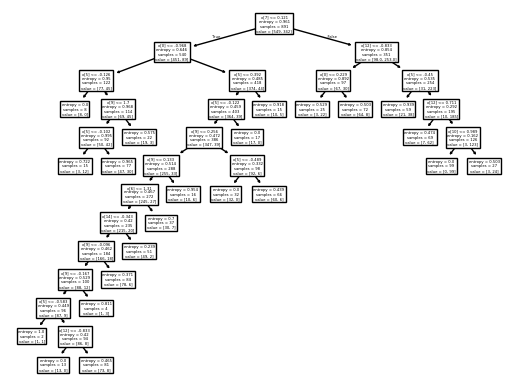

In [81]:
from sklearn.tree import plot_tree
DecisionTree=clf.best_estimator_
plot_tree(DecisionTree)

### Random forest

In [86]:
n_estimators = [2, 3, 5, 10, 25, 50, 100]
criterion = ["gini", "entropy"]
max_depth = [None, 3, 5, 7, 10]
min_samples_split = [2, 5, 10, 0.1]
min_impurity_decrease = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]

hyperparams = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_impurity_decrease": min_impurity_decrease,
}
clf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=hyperparams,
    verbose=True,
    cv=10,
    scoring="balanced_accuracy",
    n_jobs=-1,
)

clf.fit(X, y)
print(clf.best_score_)
print(clf.best_estimator_)
print(clf.best_estimator_.feature_importances_)

Fitting 10 folds for each of 1400 candidates, totalling 14000 fits
0.8354123871770931
RandomForestClassifier(criterion='entropy', min_impurity_decrease=0.0001,
                       min_samples_split=10, n_estimators=25)
[0.07720078 0.10143583 0.01446701 0.01942312 0.01447656 0.13466132
 0.02430941 0.22628583 0.03230852 0.08962173 0.04280681 0.00567171
 0.11549275 0.057038   0.04480063]


**Feature importance with random forest feature importance**

Just like logistic regression, random forest has ways to check the importance of all features in making the predictions. However, as you can see below, both methods do not completely agree. However, we see that the most important features are somewhat the same. Furthermore we can see that Age and Agebin_code are not as good as the original age. 
We can also see that it is possible to make a good feature from a lot of bad features. For example we see that family_survival is a good feature and family_size is better than parch and SibSp. As we expected earlier, embarked is not a good predictor of survival. It seems that its correlation with survival is due to the fare and title..

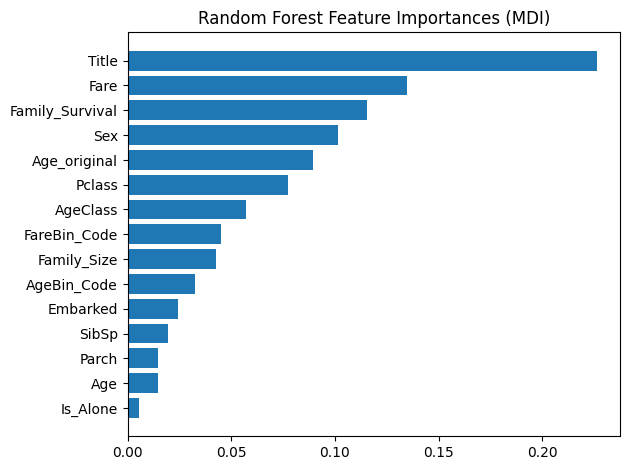

In [87]:
sorted_idx = clf.best_estimator_.feature_importances_.argsort()

y_ticks = np.arange(0, len(X.columns))
fig, ax = plt.subplots()
ax.barh(y_ticks, clf.best_estimator_.feature_importances_[sorted_idx])
ax.set_yticklabels(X.columns[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

**Feature importance with permutation_importance**

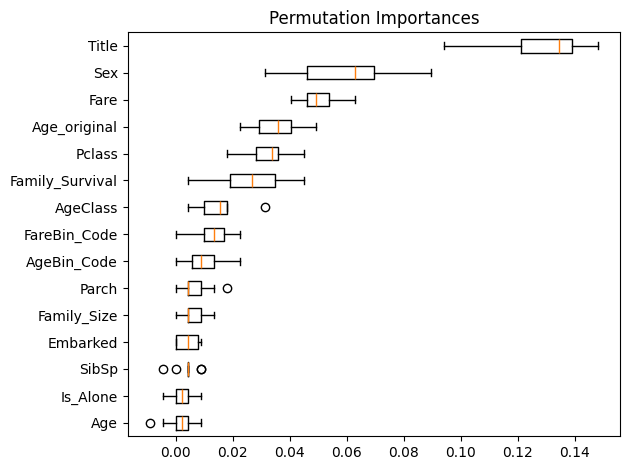

In [88]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

rf = clf.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)
rf.fit(X,y)
# plot
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances")
fig.tight_layout()
plt.show()

### What is a good model?

We know that 32% of the passengers survived. So, if you make a model that predicts everyone on the titanic to die, you would achieve around 68% accuracy (34% balanced accuracy). 
In the analysis above we have opted for balanced_accuracy, as only 32% of the people survived. Using this metric, we put as much weight on correctly predicting the survivors as non survivors. So, 83% is a pretty good score

## what's next?
We have made a couple of models and can opt to use the best performing model to predict the survivors of the test set and submit our results to the challenge.
However, we have also seen from the feature importance graphs above, that not every feature is as meaningful. 
We could also try to remove some of the unneccesary features and try to improve our classification.

## Final code
It is always important to save your thought process and the steps you performed, but it is also important to make a cell with all the final code, without all the intermediate output. 
We also performed the modelling phase in a pipeline. This is a way to create a modular and succinct framework of your models. 

To Test the Cell below, restart your kernel and run that cell by using ctrl + Enter

<Axes: xlabel='Scoring', ylabel='accuracy'>

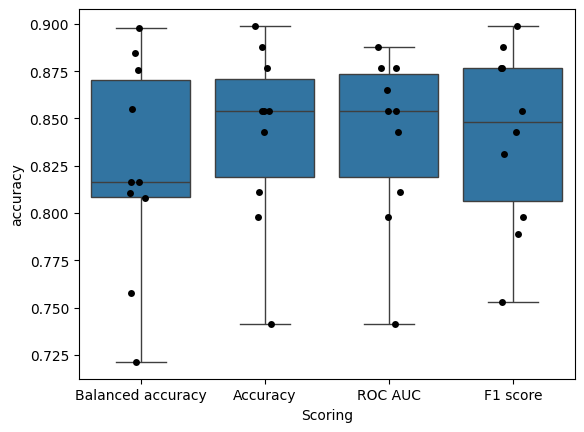

In [5]:
# importing libraries
import pandas as pd
import numpy as np
import random as rnd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Importing data:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combined_df = pd.concat([train_df, test_df], axis=0) # This dataframe contains both the train AND test data.
# Preprocessing:
# Title
combined_df['Title'] = combined_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
combined_df['Title'] = combined_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combined_df['Title'] = combined_df['Title'].replace('Mlle', 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Ms', 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Rare": 2, "Master": 3, "Miss": 4, "Mrs": 5}
combined_df['Title'] = combined_df['Title'].map(title_mapping)
combined_df['Title'] = combined_df['Title'].fillna(0)
# Gender
combined_df.replace(['male','female'],[0,1],inplace=True)
# imputing age
titles = list(combined_df['Title'].unique())
for title in titles:
    age_to_impute = list(combined_df.groupby('Title')['Age'].median())[titles.index(title)]
    mask = (combined_df['Title'] == title)
    combined_df.loc[combined_df['Age'].isnull() & mask, 'Age'] = age_to_impute
# AgeBins
combined_df['AgeBin'] = pd.qcut(combined_df['Age'], 4)
label = LabelEncoder()
combined_df['AgeBin_Code'] = label.fit_transform(combined_df['AgeBin'])
# original Age
combined_df['Age_original'] = combined_df['Age']
# 'Age' is a custom binned! to see if insights from earlier can be used to create better bins
combined_df.loc[ combined_df['Age'] <= 4, 'Age'] = 0
combined_df.loc[(combined_df['Age'] > 4) & (combined_df['Age'] <= 15), 'Age'] = 1
combined_df.loc[(combined_df['Age'] > 15) & (combined_df['Age'] <= 35), 'Age'] = 2
combined_df.loc[(combined_df['Age'] > 35) & (combined_df['Age'] <= 64), 'Age'] = 3
combined_df.loc[(combined_df['Age'] > 64) & (combined_df['Age'] <= 75), 'Age'] = 4
combined_df.loc[(combined_df['Age'] > 75), 'Age'] = 5
# Family size
combined_df['Family_Size'] = combined_df['Parch'] + combined_df['SibSp']
# Is alone
combined_df['Is_Alone'] = 0
combined_df.loc[combined_df['Family_Size'] == 0, 'Is_Alone'] = 1
# Family survival
combined_df['Last_Name'] = combined_df['Name'].apply(lambda x: str.split(x, ",")[0])
combined_df['Fare'].fillna(combined_df['Fare'].mean(), inplace=True)

DEFAULT_SURVIVAL_VALUE = 0.5
combined_df['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in combined_df[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                combined_df.loc[combined_df['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                combined_df.loc[combined_df['PassengerId'] == passID, 'Family_Survival'] = 0
for _, grp_df in combined_df.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    combined_df.loc[combined_df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    combined_df.loc[combined_df['PassengerId'] == passID, 'Family_Survival'] = 0
# Ageclass
combined_df['AgeClass'] = combined_df.Age * combined_df.Pclass
# imputing embarked
freq_port = train_df.Embarked.dropna().mode()[0]
combined_df['Embarked'] = combined_df['Embarked'].fillna(freq_port)
combined_df['Embarked'] = combined_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
# imputing fare
combined_df['Fare'].fillna(combined_df['Fare'].median(), inplace = True)
# Binning fare
combined_df['FareBin'] = pd.qcut(combined_df['Fare'], 5)
label = LabelEncoder()
combined_df['FareBin_Code'] = label.fit_transform(combined_df['FareBin'])
# dropping some features
combined_df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin','AgeBin', 'FareBin','Last_Name'], axis = 1, inplace = True)
train_df = combined_df[:891]
test_df = combined_df[891:]
# Splitting data into train and test AND normalising data
y = train_df["Survived"] #separate labels y from the dataframe, because we don't want them to be normalised
scaler = StandardScaler()
scaled_df = scaler.fit_transform(train_df)
train_df = pd.DataFrame(scaled_df, columns=train_df.columns)
X = train_df.drop(["Survived"], axis=1)
scaled_df = scaler.fit_transform(test_df)
test_df = pd.DataFrame(scaled_df, columns=test_df.columns)
X_test = test_df.drop(["Survived"], axis=1).copy()
# Model, fit, and predict pipeline
random_forest_classifier = RandomForestClassifier(min_impurity_decrease=1e-07, min_samples_split=10,
                       n_estimators=50) # Best estimator parameters
balanced_accuracy_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, X, y, cv=10,
                                                                 scoring='balanced_accuracy'), 'Scoring': ['Balanced accuracy'] * 10})
accuracy_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, X, y, cv=10),
                      'Scoring': ['Accuracy'] * 10})
roc_auc_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, X, y, cv=10),
                      'Scoring': ['ROC AUC'] * 10})
f1_score_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, X, y, cv=10),
                      'Scoring': ['F1 score'] * 10})
df  = [accuracy_df, roc_auc_df, f1_score_df]
both_df = pd.concat([balanced_accuracy_df] + df, ignore_index=True)

sns.boxplot(x='Scoring', y='accuracy', data=both_df)
sns.stripplot(x='Scoring', y='accuracy', data=both_df, jitter=True, color='black')

In [8]:
# using the best model to predict the survivors of X_test
random_forest_classifier = RandomForestClassifier(
    criterion="entropy",
    max_depth=10,
    min_impurity_decrease=0.001,
    n_estimators=50,
    random_state=42,
)
random_forest_classifier.fit(X, y)
y_pred = random_forest_classifier.predict(X_test).astype(int)
y_pred
# if you want to make a submission for the challenge:
temp = pd.DataFrame(pd.read_csv("test.csv")["PassengerId"])
temp["Survived"] = y_pred
temp.to_csv("submission.csv", index=False)
# This achieves 0.806 accuracy on the test set, as I submitted the result to Kaggle. This is a top 3% result
# Can we upgrade the model by iterating over our process?